### Object-Oriented Programming

In OOP, we create objects with:
- Abilities (methods)
- Data (attributes)

In [1]:
class BankAccount:
    def __init__(self, balance):        
        self.balance = balance

- **`__init__`** is called when BankAccount object is created
- **`balance`** is the attribute of the BankAccount object

In [2]:
account = BankAccount(100)
print(account.balance)

100


In [3]:
class BankAccount:
    def __init__(self, balance):        
        self.balance = balance
        
    def deposit(self, amount):        
        self.balance += amount

- **`Methods`**: Python functions to perform tasks
- **`deposit`** method increases balance

In [4]:
account = BankAccount(100)
account.deposit(50)

print(account.balance)

150


### PyTorch Dataset

In [5]:
import numpy as np
import pandas as pd
from torch.utils.data import Dataset

class WaterDataset(Dataset):
    def __init__(self, csv_path):
        super().__init__()        
        df = pd.read_csv(csv_path)        
        self.data = df.to_numpy()
    
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, idx):        
        features = self.data[idx, :-1]        
        label = self.data[idx, -1]
        return features, label

- **`__init__`**: Load data and store it as a NumPy array  
  - `super().__init__()` ensures `WaterDataset` behaves like a PyTorch `Dataset`<br><br>        

- **`__len__`**: Return the size of the dataset

- **`__getitem__`**: Takes one argument called `idx`; returns features and label for a single sample at index `idx`


### PyTorch Dataloader

In [6]:
from torch.utils.data import DataLoader

dataset_train = WaterDataset("water_potability/water_train.csv")

dataloader_train = DataLoader(dataset_train, batch_size=2, shuffle=True,)

features, labels = next(iter(dataloader_train))
print(f"Features: {features},\nLabels: {labels}")

Features: tensor([[0.5465, 0.4919, 0.3329, 0.5723, 0.7073, 0.7175, 0.2717, 0.3218, 0.4580],
        [0.5125, 0.5534, 0.5441, 0.4657, 0.5882, 0.2737, 0.3373, 0.4804, 0.6415]],
       dtype=torch.float64),
Labels: tensor([0., 0.], dtype=torch.float64)


### PyTorch Model

In [7]:
# Sequential Model

import torch
import torch.nn as nn

net = nn.Sequential(  
    nn.Linear(9, 16),  
    nn.ReLU(),  
    nn.Linear(16, 8),  
    nn.ReLU(),  
    nn.Linear(8, 1),  
    nn.Sigmoid(),
)

In [8]:
# Class-based Model Definition

class Net(nn.Module):
    def __init__(self):
        super().__init__()        
        self.fc1 = nn.Linear(9, 16)        
        self.fc2 = nn.Linear(16, 8)        
        self.fc3 = nn.Linear(8, 1)
    
    def forward(self, x):        
        x = nn.functional.relu(self.fc1(x))        
        x = nn.functional.relu(self.fc2(x))        
        x = nn.functional.sigmoid(self.fc3(x))
        return x

net = Net()

In [9]:
# training ver 1 & 2

class WaterDataset(Dataset):
    def __init__(self, csv_path):
        super().__init__()
        # Load data to pandas DataFrame
        df = pd.read_csv(csv_path)
        # Convert data to a NumPy array and assign to self.data
        self.data = df.to_numpy()
        
    # Implement __len__ to return the number of data samples
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, idx):
        features = self.data[idx, :-1]
        # Assign last data column to label
        label = self.data[idx, -1]
        return features, label


# Create an instance of the WaterDataset
dataset_train = WaterDataset('water_potability/water_train.csv')

# Create a DataLoader based on dataset_train
dataloader_train = DataLoader(
    dataset_train,
    batch_size=2,
    shuffle=True,
)

# Get a batch of features and labels
features, labels = next(iter(dataloader_train))
print(features, labels)

tensor([[0.5187, 0.3063, 0.7431, 0.5603, 0.5555, 0.6221, 0.6033, 0.4687, 0.5727],
        [0.4561, 0.5096, 0.3525, 0.4662, 0.6363, 0.4914, 0.3571, 0.4859, 0.4664]],
       dtype=torch.float64) tensor([1., 1.], dtype=torch.float64)


In [10]:
# training ver 3

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Define the three linear layers
        self.fc1 = nn.Linear(9, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        
    def forward(self, x):
        # Pass x through linear layers adding activations
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x)) 
        x = nn.functional.sigmoid(self.fc3(x)) 
        return x

### Optimizers, Training, and Evaluation

In [11]:
import torch.optim as optim

# Code fix
class WaterDataset(Dataset):
    def __init__(self, csv_path):
        super().__init__()
        df = pd.read_csv(csv_path)
        self.X = df.iloc[:, :-1].values.astype('float32')  # Features
        self.y = df.iloc[:, -1].values.astype('float32')   # Labels (0 or 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        features = torch.tensor(self.X[idx], dtype=torch.float32)
        label = torch.tensor(self.y[idx], dtype=torch.float32)
        return features, label

# Load dataset and DataLoader
dataset_train = WaterDataset("water_potability/water_train.csv")
dataloader_train = DataLoader(dataset_train, batch_size=2, shuffle=True)

# Define your model
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(9, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Use torch.sigmoid instead of deprecated nn.functional.sigmoid
        return x

net = Net()

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
    for features, labels in dataloader_train:
        optimizer.zero_grad()
        outputs = net(features)
        loss = criterion(outputs, labels.view(-1, 1))  # reshape labels to match output
        loss.backward()
        optimizer.step()

# Optional: Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.7135
Epoch 100, Loss: 0.6507
Epoch 200, Loss: 0.3108
Epoch 300, Loss: 1.3374
Epoch 400, Loss: 0.7089
Epoch 500, Loss: 0.2064
Epoch 600, Loss: 0.4052
Epoch 700, Loss: 0.4603
Epoch 800, Loss: 1.1014
Epoch 900, Loss: 1.1106


In [12]:
# Training Loop

# import torch.nn as nn
# import torch.optim as optim

# criterion = nn.BCELoss()
# optimizer = optim.SGD(net.parameters(), lr=0.01)

# for epoch in range(1000):
#     for features, labels in dataloader_train:        
#         optimizer.zero_grad()        
#         outputs = net(features)        
#         loss = criterion(
#             outputs, labels.view(-1, 1)
#         )        
        
#         loss.backward()        
#         optimizer.step()

- Define loss function and optimizer
  - `BCELoss` for binary classification
  - `SGD` optimizer<br><br>

- Iterate over epochs and training batches
- Clear gradients
- Forward pass: get model's outputs
- Compute loss
- Compute gradients
- Optimizer's step: update params

### How an Optimizer Works

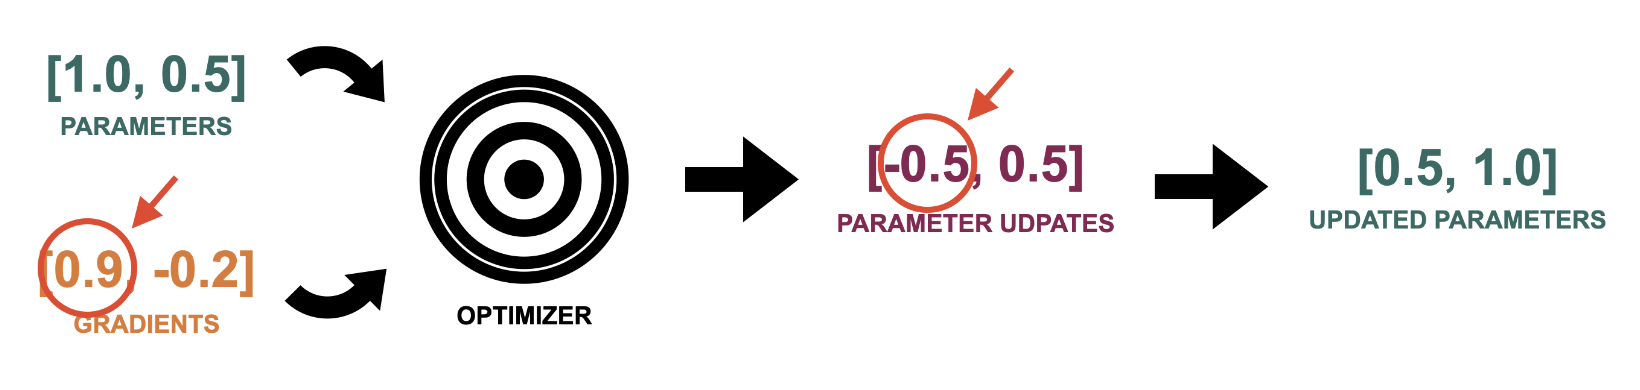

### Stochastic Gradient Descent (SGD)

In [13]:
optimizer = optim.SGD(net.parameters(), lr=0.01)

- Update depends on learning rate
- Simple and efficient, for basic models
- Rarely used in practice

### Adaptive Gradient (Adagrad)

In [14]:
optimizer = optim.Adagrad(net.parameters(), lr=0.01)

- Adapts learning rate for each parameter
- Good for sparse data
- May decrease the learning rate too fast

### Root Mean Square Propagation (RMSprop)

In [15]:
optimizer = optim.RMSprop(net.parameters(), lr=0.01)

- Update for each parameter based on the size of its previous gradients

### Adaptive Moment Estimation (Adam)

In [16]:
optimizer = optim.Adam(net.parameters(), lr=0.01)

- Arguably the most versatile and widely used
- RMSprop + gradient momentum
- Often used as the go-to optimizer

### Model Evaluation

In [17]:
from torchmetrics import Accuracy

# Create test dataset
dataset_test = WaterDataset("water_potability/water_test.csv")

# Create test dataloader
dataloader_test = DataLoader(dataset_test, batch_size=2, shuffle=False)

acc = Accuracy(task="binary")

net.eval()

with torch.no_grad():
    for features, labels in dataloader_test:        
        outputs = net(features)        
        preds = (outputs >= 0.5).float()        
        acc(preds, labels.view(-1, 1))
    
    accuracy = acc.compute()
    print(f"Accuracy: {accuracy}")

Accuracy: 0.6322067379951477


- Set up accuracy metric
- Put model in eval mode and iterate overtest data batches with no gradients
- Pass data to model to get predicted probabilities
- Compute predicted labels
- Update accuracy metric

In [18]:
# training ver 3

# import torch.optim as optim

# net = Net()

# # Define the SGD optimizer
# optimizer = optim.SGD(net.parameters(), lr=0.001)

# train_model(
#     optimizer=optimizer,
#     net=net,
#     num_epochs=10,
# )

# net = Net()

# # Define the RMSprop optimizer
# optimizer = optim.RMSprop(net.parameters(), lr=0.001)

# train_model(
#     optimizer=optimizer,
#     net=net,
#     num_epochs=10,
# )

# net = Net()

# # Define the Adam optimizer
# optimizer = optim.Adam(net.parameters(), lr=0.01)

# train_model(
#     optimizer=optimizer,
#     net=net,
#     num_epochs=10,
# )

In [19]:
# training ver 4

# # Set up binary accuracy metric
# acc = Accuracy(task="binary")

# net.eval()
# with torch.no_grad():
#     for features, labels in dataloader_test:
#         # Get predicted probabilities for test data batch
#         outputs = net(features)
#         preds = (outputs >= 0.5).float()
#         acc(preds, labels.view(-1, 1))

# # Compute total test accuracy
# test_accuracy = acc.compute()
# print(f"Test accuracy: {test_accuracy}")

### Vanishing and Exploding Gradient

#### Vanishing Gradient
- Gradients get smaller and smaller during backward pass
- Earlier layers get small parameter updates
- Model doesn't learn

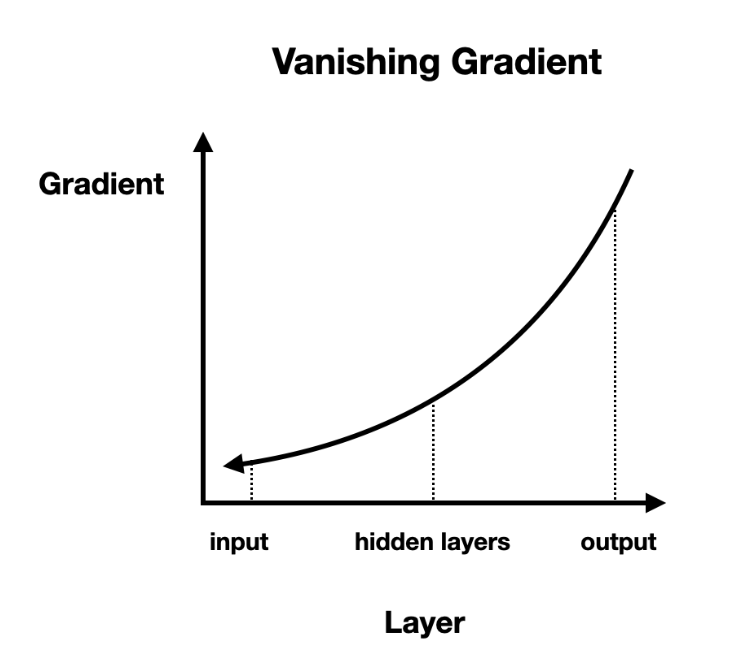

#### Exploding Gradient
- Gradients get bigger and bigger
- Parameter updates are too large
- Training diverges

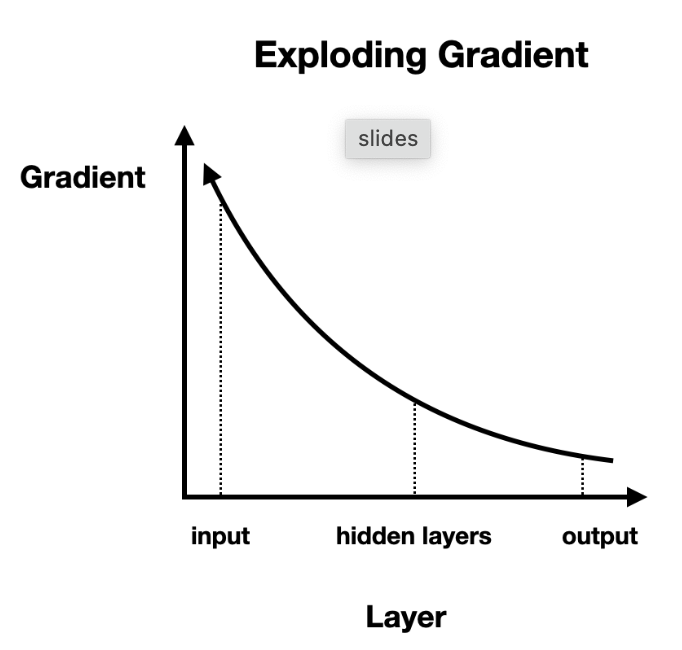

#### Solution to unstable gradients

1. Proper weights initialization
2. Good activations
3. Batch normalization

### Weights Initialization

In [20]:
layer = nn.Linear(8, 1)
print(layer.weight)

Parameter containing:
tensor([[ 0.0497,  0.2978,  0.1836,  0.2170,  0.3098, -0.0320, -0.3084,  0.1212]],
       requires_grad=True)


Good initialization ensures:
- Variance of layer inputs = variance of layer outputs
- Variance of gradients the same before and after a layer

How to achieve this depends on the activation:
- For ReLU and similar, we can use **He/Kaiming initialization**

In [21]:
import torch.nn.init as init

init.kaiming_uniform_(layer.weight)
print(layer.weight)

Parameter containing:
tensor([[ 0.0821, -0.7696, -0.8644,  0.1737, -0.2046,  0.1065, -0.7565,  0.0729]],
       requires_grad=True)


### He / Kaiming Initialization

In [23]:
# init.kaiming_uniform_(self.fc1.weight)
# init.kaiming_uniform_(self.fc2.weight)
# init.kaiming_uniform_(self.fc3.weight, nonlinearity="sigmoid",)

In [24]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()        
        self.fc1 = nn.Linear(9, 16)        
        self.fc2 = nn.Linear(16, 8)        
        self.fc3 = nn.Linear(8, 1)        
        init.kaiming_uniform_(self.fc1.weight)        
        init.kaiming_uniform_(self.fc2.weight)        
        init.kaiming_uniform_(         
            self.fc3.weight,          
            nonlinearity="sigmoid",        
        )

In [25]:
def forward(self, x):       
    x = nn.functional.relu(self.fc1(x))        
    x = nn.functional.relu(self.fc2(x))       
    x = nn.functional.sigmoid(self.fc3(x))
    return x

### Activation Functions

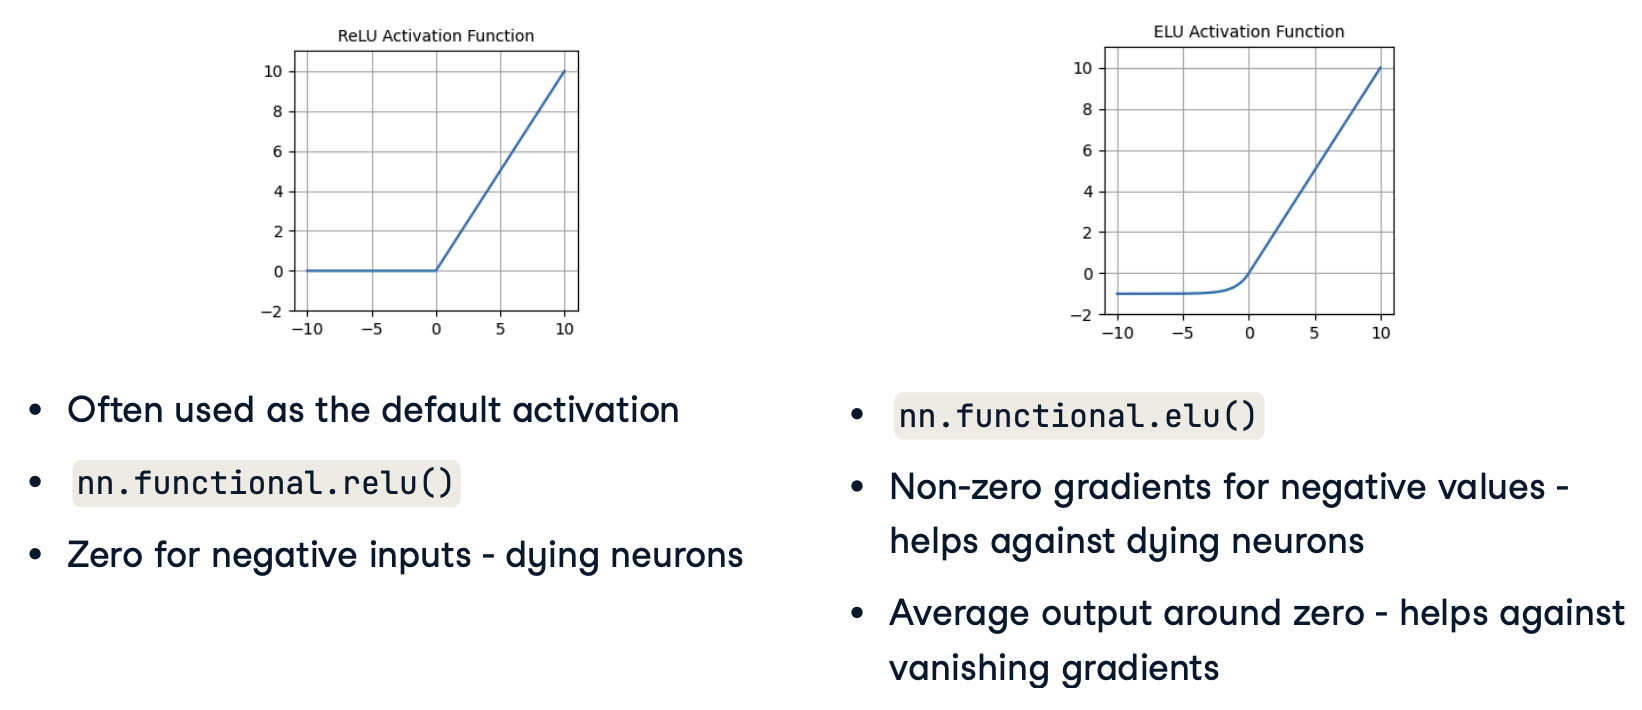

### Batch Normalization

After a layer:
1. Normalize the layer's outputs by:
   - Subtracting the mean
   - Dividing by the standard deviation<br><br>

2. Scale and shift normalized outputs using learned parameters

Model learns optimal inputs distribution for each layer:
- Faster loss decrease
- Helps against unstable gradients

In [26]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(9, 16)
        self.bn1 = nn.BatchNorm1d(16)

        self.fc2 = nn.Linear(16, 8)
        self.bn2 = nn.BatchNorm1d(8)

        self.fc3 = nn.Linear(8, 1)
        # No batch norm after the final layer (optional)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.elu(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = F.elu(x)

        x = self.fc3(x)
        x = torch.sigmoid(x)  # For binary classification using BCELoss

        return x

In [27]:
# training ver 5

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(9, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        
        # Apply He initialization
        init.kaiming_uniform_(self.fc1.weight)
        init.kaiming_uniform_(self.fc2.weight)
        init.kaiming_uniform_(self.fc3.weight, nonlinearity="sigmoid")

    def forward(self, x):
        # Update ReLU activation to ELU
        x = nn.functional.elu(self.fc1(x))
        x = nn.functional.elu(self.fc2(x))
        x = nn.functional.sigmoid(self.fc3(x))
        return x

In [28]:
# training ver 6

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(9, 16)
        # Add two batch normalization layers
        self.bn1 = nn.BatchNorm1d(16)
        self.fc2 = nn.Linear(16, 8)
        self.bn2 = nn.BatchNorm1d(8)
        self.fc3 = nn.Linear(8, 1)
        
        init.kaiming_uniform_(self.fc1.weight)
        init.kaiming_uniform_(self.fc2.weight)
        init.kaiming_uniform_(self.fc3.weight, nonlinearity="sigmoid")
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = nn.functional.elu(x)

        # Pass x through the second set of layers
        x = self.fc2(x)
        x = self.bn2(x)
        x = nn.functional.elu(x)

        x = nn.functional.sigmoid(self.fc3(x))
        return x